In [1]:
# import required libraries
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read excel into dataframe
df_Cardiorespiratory = pd.read_excel("V02Max_Combined.xlsx",sheet_name=None)
# read each sheet and store it in a dataframe
df_Kayaking = df_Cardiorespiratory["Kayaking"]
df_Athletes = df_Cardiorespiratory["Athletes"]
df_Triathlon = df_Cardiorespiratory["Triathlon"]
df_Fencing = df_Cardiorespiratory["Fencing"]

### Q1.Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.¶

In [3]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])
df_join_allsports_excel=df_join_allsports.to_excel("Sports.xlsx")  
df_join_allsports_excel

### Q2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly


In [4]:
df_join_allsports_copy=df_join_allsports.copy()
df_join_allsports_copy['hr'] = round(60/(df_join_allsports['RR']/1000), 2)
li_StatusClassification = []
for index, row in df_join_allsports_copy.iterrows():
    time=row['time']
    power=row['power']
    if time < 0 :
        li_StatusClassification.append("WarmUp")
    elif time >= 0 and power != 0:
         li_StatusClassification.append("Graded Exercise Test")
    else:
        li_StatusClassification.append("Cool down")
df_join_allsports_copy.insert(5,"Status", li_StatusClassification)
df_join_allsports_copy

,ID,time,RR,VO2,power,Status,hr
0,11,-168.600,727.0,0.287147,0,WarmUp,82.53
1,11,-167.872,728.0,0.287147,0,WarmUp,82.42
2,11,-167.148,724.0,0.287147,0,WarmUp,82.87
3,11,-166.484,664.0,0.320580,0,WarmUp,90.36
4,11,-165.836,648.0,0.320580,0,WarmUp,92.59
...,...,...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0,Cool down,140.19
27599,10,943.124,424.0,0.786363,0,Cool down,141.51
27600,10,943.552,428.0,0.786363,0,Cool down,140.19
27601,10,943.976,424.0,0.786363,0,Cool down,141.51


### Q15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
### Zone 1 (recovery/easy)       <100 HR max
### Zone 2 (aerobic/base)        100-120 HR max
### Zone 3 (tempo)        120-135 HR max
### Zone 4 (lactate threshold)        135-155 HR max
### Zone 5 (anaerobic)        155+ HR max and above

In [12]:
# Calculating Zone using HR_Max with below formula
#  (Max HR is calculated as 220-Age)
df_Athletes['MaxHR'] = 220-df_Athletes['age']
df_join_allsports['hr']=60/(df_join_allsports['RR']/1000)
df_tempCategory = pd.merge(df_Athletes[['ID','MaxHR']],df_join_allsports[['time','hr','ID']],on='ID')
li_HRClassification = []
for index, row in df_tempCategory.iterrows():
    tempHR = row["MaxHR"]
    if tempHR < 100.0:
        li_HRClassification.append("Zone 1")
    elif tempHR >= 100.0 and tempHR <= 120.0:
        li_HRClassification.append("Zone 2")
    elif tempHR >= 120.0 and tempHR <= 135.0:
        li_HRClassification.append("Zone 3")
    elif tempHR >= 135.0 and tempHR <= 155.0:
        li_HRClassification.append("Zone 4")
    elif tempHR > 155.0:
        li_HRClassification.append("Zone 5")
df_tempCategory.insert(4,"HeartZone", li_HRClassification, True)
df_tempCategory

,ID,MaxHR,time,hr,HeartZone
0,1,205,-130.840,89.285714,Zone 5
1,1,205,-130.168,89.285714,Zone 5
2,1,205,-129.536,94.936709,Zone 5
3,1,205,-128.824,84.269663,Zone 5
4,1,205,-127.948,68.493151,Zone 5
...,...,...,...,...,...
52057,18,208,947.288,111.940299,Zone 5
52058,18,208,947.816,113.636364,Zone 5
52059,18,208,948.344,113.636364,Zone 5
52060,18,208,948.884,111.111111,Zone 5


In [6]:
# Calculating Zone using HR
df_join_allsports['hr'] = round(60/(df_join_allsports['RR']/1000), 2)
df_tempCategory = pd.merge(df_Athletes[['ID', 'sport']],df_join_allsports[['hr', 'ID']],on='ID')
li_HRClassification = []
def hz_sports(hr):
    if hr < 100.0:
        return "Zone 1"
    elif hr >= 100.0 and hr <= 120.0:
        return "Zone 2"
    elif hr >= 120.0 and hr <= 135.0:
        return "Zone 3"
    elif hr >= 135.0 and hr <= 155.0:
        return "Zone 4"
    elif hr > 155.0:
        return "Zone 5"
df_tempCategory['HeartZone'] = df_tempCategory['hr'].apply(hz_sports)
df_tempCategory

,ID,sport,hr,HeartZone
0,1,fencing,89.29,Zone 1
1,1,fencing,89.29,Zone 1
2,1,fencing,94.94,Zone 1
3,1,fencing,84.27,Zone 1
4,1,fencing,68.49,Zone 1
...,...,...,...,...
52057,18,triathlon,111.94,Zone 2
52058,18,triathlon,113.64,Zone 2
52059,18,triathlon,113.64,Zone 2
52060,18,triathlon,111.11,Zone 2


### Q21.Display a pie chart of number of athletes by sport

([<matplotlib.patches.Wedge at 0x24dd7467c20>,
 [Text(-0.1910130855889933, 1.083288512416601, 'fencing'),
  Text(-0.19101278131461502, -1.0832885660683653, 'kayak'),
  Text(1.0336619699471659, -0.37622191840048963, 'triathlon')])

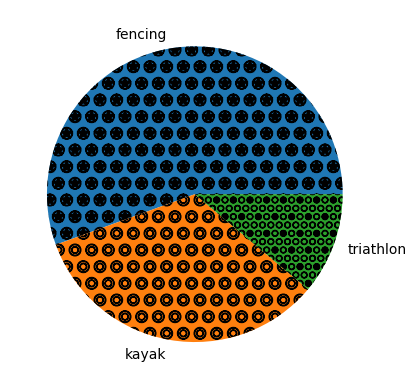

In [7]:
cnt_of_athletes=df_Athletes['sport'].value_counts()
label=df_Athletes['sport'].unique()
plt.pie(cnt_of_athletes,hatch=['*O', 'oO', 'O.O'],labels=label)

### Q22.Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [8]:
HR_10values=60/(df_Kayaking['RR']/1000).head(10)
HR_10values1=HR_10values.round(0)
for row_value in HR_10values1:
    if row_value%2 == 0:
        print(row_value,"is an even number")
    else:
        print(row_value,"is an odd number")

83.0 is an odd number
82.0 is an even number
83.0 is an odd number
90.0 is an even number
93.0 is an odd number
97.0 is an odd number
86.0 is an even number
75.0 is an odd number
76.0 is an even number
78.0 is an even number


### Q23.Which heart rate zone did most participants spend the longest duration of time in?

In [14]:
df_tempCategory

,ID,sport,hr
0,1,fencing,89.285714
1,1,fencing,89.285714
2,1,fencing,94.936709
3,1,fencing,84.269663
4,1,fencing,68.493151
...,...,...,...
52057,18,triathlon,111.940299
52058,18,triathlon,113.636364
52059,18,triathlon,113.636364
52060,18,triathlon,111.111111


In [13]:
df_tempCategory = pd.merge(df_Athletes[['ID', 'sport']],df_join_allsports[['hr', 'ID']],on='ID')
df_tempCategory
d1=df_tempCategory.groupby(['ID','HeartZone'])['time'].max().reset_index()
d1.sort_values(by='time',ascending=False).head(1)

KeyError: 'HeartZone'

### Q24.Store athlete name and sport in a dictionary as a pair of values.

In [ ]:
# initialize a dictionary to store values
dict_athlete = {}

df_Athletes['Full_name'] = df_Athletes['First Name']+ " "+ df_Athletes['Last Name'] #Concat the name
df_name_sport = pd.DataFrame(df_Athletes, columns=["Full_name","sport"])
# read the data and store it in dict
for index, row in df_name_sport.iterrows():
    dict_athlete[row["Full_name"]] = row["sport"]
dict_athlete

### Q25.Using arrays and loops, find the count of athletes based on gender.

In [ ]:
FemaleCount=0
MaleCount=0
for index, row in df_Athletes.iterrows():
    if row['Gender'] == 'Female':
        FemaleCount+=1        
    else:
        MaleCount+=1

print("Female",FemaleCount)
print("Male",MaleCount)

### Q26.Create a sankey diagram to show the groups of race within each sport

In [ ]:
df_result = df_Athletes.groupby(['sport','Ethnicity'])['ID'].count().reset_index()
df_result.columns=['source','target','value']
unique_source_target=list(pd.unique(df_result[["source","target"]].values.ravel("K")))
mapping_dict={k:v for v, k in enumerate(unique_source_target)}
df_result["source"]=df_result["source"].map(mapping_dict)
df_result["target"]=df_result["target"].map(mapping_dict)
df_result_dict=df_result.to_dict(orient="list")
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_source_target,
      color = "blue"
    ),
    
    link = dict(
      source = df_result_dict["source"],
      target = df_result_dict["target"],
      value = df_result_dict["value"],
      )
 )])
fig.update_layout(title_text="Athletes Sankey Diagram", font_size=10)
fig.show()

### Q27.Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

In [ ]:
df_join_allsports['hr']=60/(df_join_allsports['RR']/1000)
d1['Avg_HR']=df_join_allsports.groupby(['ID'])['hr'].mean()
#df_Athletes.insert(11, "Avg_HR",d1['Avg_HR'])
df_Athletes

### Q28.Print athlete 15s Age and Pvt1 using the format() function

In [ ]:
id15=df_Athletes.query("ID==15")
print('{},{}.'.format(id15['age'],id15['P_vt1']))

### Q29.On average how long was each participants’ warm up?

In [ ]:
Warm_up=df_join_allsports_copy.query("Status=='WarmUp'")
each_Id=Warm_up.groupby(['ID'])['time'].mean().reset_index()
each_Id

### Q30.Display the HRV of each athlete?

In [ ]:
new_df = pd.DataFrame()
df_ID = df_join_allsports["ID"].unique()
for row in df_ID:
    df3 = df_join_allsports.query("ID==" + str(row))
    df3[['HRV']] = df3[['RR']].diff(periods=1)
    frames = [new_df, df3[['ID', 'HRV']]]
    new_df = pd.concat(frames, ignore_index=True)
df3=new_df.dropna()   
df3=df3.groupby('ID').std()
print(df3)


### Q31.Return the count of athletes for any sport that the user inputs.

In [ ]:
user_input = input("Enter a Sport Name:")
athletes_cnt=0
for index, row in df_Athletes.iterrows():
    if row['sport'] == user_input:
        athletes_cnt+=1    
print("Count of athletes:",athletes_cnt)

### Q32.Insert the name of every athlete into an array and display the length of that array.

In [ ]:
athlete_name_arr=[]
df_Athletes['Full_name'] = df_Athletes['First Name']+ " "+ df_Athletes['Last Name'] #Concat the name
for index, row in df_Athletes.iterrows():
    athlete_name_arr.append(row['Full_name'])
print("Display the length of the array: ",len(athlete_name_arr))

### Q33.Create a list and a tuple. Print the types and lengths of both.

In [ ]:
list1=['A','B','C']
tuple1=('W','X','Y','Z')
print("Type of list:",type(list1), "Length of List:",len(list1),"Type of Tuple:",type(tuple1),"Length of Tuple:",len(tuple1))

### Q34.Display a word cloud using any values in the dataset

In [ ]:
df = df_Athletes
text = df['First Name']
wordcloud = WordCloud(max_font_size=100,width = 1000, height = 500,background_color='white').generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Q35.Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

In [ ]:
df_Athletes_copy=df_Athletes.copy()
#BMI Calculation
df_Athletes_copy['BMI']=df_Athletes_copy['Weight']/((df_Athletes_copy['Height']/100)*(df_Athletes_copy['Height']/100))

x=[] #vO2
y=[] #BMI
unique_Id=df_Kayaking['ID'].unique()
for i in unique_Id:
    se=df_Kayaking[df_Kayaking['ID']==i]
    VO2max=se['VO2'].max()
    x.append(VO2max)
    h1=df_Athletes_copy[df_Athletes['ID']==i]
    BMImean=h1['BMI'].mean()
    y.append(BMImean)

    
df2 = pd.DataFrame()
df2['x']=x
df2['y']=y
df2
sns.regplot(x=x,y=y,data=df2)
#adding labels and title
plt.xlabel('Max VO2')
plt.ylabel('Mean BMI')
plt.title('Regression plot: Max EDA vs. Mean HR')

#show the plot
plt.show()

### Q36.Plot the time series of HR( every 5 mins) of athlete 1

In [ ]:
df_join_allsports['hr']=60/(df_join_allsports['RR']/1000)
ID1=df_join_allsports[df_join_allsports['ID']==1]
ts=ID1[ID1['time']%5==0]
ax=plt.gca()
ts.head(10).plot(x='time',
                y='hr',
                title='Time series of HR( every 5 mins) of ID 1',
                color='blue',ax=ax)
plt.show()

### Q37.What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.¶

In [ ]:
max_df=df_join_allsports.iloc[df_join_allsports[['power']].idxmax()]
pd.merge(df_Athletes[["First Name","Last Name","sport","ID"]],max_df[["ID","power"]], on="ID")

### Q38.What is the average difference in IBI during the warm up Vs the actual test?

In [ ]:
df_join_allsports_copy['IBI']=df_join_allsports_copy['time'].diff()
mean=df_join_allsports_copy.groupby('Status')['IBI'].mean()

Avg_Diff=mean['Graded Exercise Test']- mean['WarmUp']
print(Avg_Diff)

### Q39.Print out what's in indexes 7, 10, and 3 for the array in [1, 2, 3, 4, 5,6,7,8,9,10]

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(a[7])
print(a[3])
print(a[10])

### Q40.[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99"

In [ ]:
arr = np.array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

my_array=arr[[0,0,0],[0,2,4]]

my_array[my_array < 4] = 99
my_array

### Q41.What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [ ]:
lowest_wattage=df_join_allsports.groupby('ID')['power'].max().reset_index()
df_low_wattage=lowest_wattage.iloc[lowest_wattage[['power']].idxmin()]
df_low_wattage
pd.merge(df_Athletes[["First Name","Last Name","sport","ID"]],df_low_wattage[["ID","power"]], on="ID")

### Q42. What was the difference in heart rate between warm up and GET for athlete 1

In [ ]:
df_join_allsports_copy
ID_1=df_join_allsports_copy.query("ID==1 ")
diff_in_HR_ID1=ID_1.groupby('Status')['hr'].mean()
HRdiff_Ath1=diff_in_HR_ID1['Graded Exercise Test']-diff_in_HR_ID1['WarmUp']
HRdiff_Ath1

### Q43.Create a pivot table that shows count of patients within each age group and sport

In [ ]:
pivot = pd.pivot_table(
    df_Athletes,
    values='ID',
    columns=('age','sport'),
    aggfunc='count'
)
print(pivot)

### Q44.Display a distrubution chart of MAX V02 for all athletes

In [ ]:
distribution_chart=df_join_allsports.groupby('ID')['VO2'].max()
sns.displot(distribution_chart) 

### Q45. Create a dummy array with no data with a size of 15.¶

In [ ]:
dummy_array=np.empty(shape=(15))
dummy_array

### Q46. How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [ ]:
df_join_allsports_copy['time_minutes']=df_join_allsports_copy['time']/60
ID_15=df_join_allsports_copy.query("ID==15 & Status=='Graded Exercise Test'")
print("Total V02:",ID_15['VO2'].sum())
print("VO2 MAX:",ID_15['VO2'].max())
print("Total time in minutes:",ID_15['time_minutes'].max())

### Q47.Convert ' sport' into a numeric field through Label encoding

In [ ]:

le=LabelEncoder()
df_Athletes['sport']=le.fit_transform(df_Athletes['sport'])
df_Athletes

### Q48.What was the average age of the athletes?

In [ ]:
Average_age_of_athletes = df_Athletes["age"].mean()
Average_age_of_athletes

### Q49. Retrieve the row with minimum IBI for fencing athletes using sorting technique.¶

In [ ]:
df_Fencing_copy=df_Fencing.copy()
df_Fencing_copy['IBI']=df_Fencing_copy['RR'].diff()
sorted_df = df_Fencing_copy.sort_values(by=['IBI'], ascending=True)
sorted_df.head(1)

### Q50. Create a violin chart using any 2 columns in the dataset

In [ ]:
sns.violinplot( x='Ethnicity', y='age',data=df_Athletes)

### Q51. List every athlete’s V02 ml/kg

In [ ]:
vo2_total=df_join_allsports.groupby('ID')['VO2'].sum()
df_vo2mlkg = pd.merge(df_Athletes, vo2_total, on="ID")
df_vo2mlkg["vo2_mlkg"]=(df_vo2mlkg["VO2"]/df_vo2mlkg["Weight"])
print(df_vo2mlkg[["ID","vo2_mlkg"]])

### Q52. Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [ ]:
first_rows = df_join_allsports.groupby('ID').first()
li_fittest_athlete=[]
first_merge=pd.merge(df_Athletes,first_rows,on='ID')
second_merge=pd.merge(df_Athletes_copy, df_join_allsports,on='ID')
df_fitparticipant=pd.merge(first_merge, second_merge,on='ID')

for index, row in df_fitparticipant.iterrows():
    tempHR = row["MaxHR"]
    BMI=row['BMI']
    if tempHR > 155.0 & (BMI >= 18.5 and BMI <= 24.9) & (first_rows[hr] >=60 and first_rows[hr] <=100):
        li_fittest_athlete.append()
print("The fittest person is: ", df_fitparticipant['ID'] )
    
    



### Q53.phonebook={"john":938477566,"Jack":938377264,"Jill":947662781} ,find the phone number of Jill

In [ ]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
phonebook['Jill']

### Q54. Create a Pie chart for Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

In [ ]:
athletes=df_join_allsports.groupby('ID')['VO2'].max()
label=df_Athletes['ID']
##a=athletes.max()
##myexplode=a(0.2)
myexplode=[0,0,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0]
plt.title('Athletes with Highest VO2')
plt.pie(athletes,labels=label,explode=myexplode)

### Q55. Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate¶

In [ ]:
df_Triathlon['HR']=60/(df_Triathlon['RR']/1000)
d1=df_Triathlon[df_Triathlon['HR'] == df_Triathlon['HR'].max()]
merge_table=pd.merge(d1,df_Athletes,on='ID').reset_index()
for index, row in df_Triathlon.iterrows():
    #print(row['HR'])
    if row['HR'] == merge_table.iloc[0]['HR']:
         print(merge_table[['ID', 'First Name', 'Last Name', 'age', 'Height', 'Weight','HR','sport', 'Gender', 'Ethnicity']]);

### Q56.Display a histogram to show distribution of athletes by sport.

In [ ]:
sns.displot(df_Athletes, x="sport")

### Q57.get the first letter of last name of students using for loops and RegEX¶

In [ ]:
lastname = df_Athletes['Last Name']
for i in lastname:
    firstChar = re.findall(r"^\w", i)
    print(firstChar[0])

### Q58.What is the average % difference in heart rate between warm up and GET for all athletes?

In [ ]:
df_join_allsports_HRdiff_copy=df_join_allsports_copy.copy()
df_join_allsports_HRdiff_copy['diff']=df_join_allsports_HRdiff_copy['hr'].diff(periods=1)
d1=df_join_allsports_HRdiff_copy.groupby('Status')['diff'].mean().reset_index()
filter=d1.query("Status=='Graded Exercise Test' | Status=='WarmUp'")
avg_perc_Diff=((filter['diff'].sum())/(len(filter['diff'])))*100
avg_perc_Diff

### Q59. Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [ ]:
df_height=df_Athletes[df_Athletes['Height']==df_Athletes['Height'].max()]
vo2_total=df_join_allsports.groupby('ID')['VO2'].sum()
df_tallest_athlete = pd.merge( df_height, vo2_total, on="ID")
df_tallest_athlete["vo2_mlkg"]=(df_tallest_athlete["VO2"]/df_tallest_athlete["Weight"])
print(df_tallest_athlete[["ID","Height", "sport","vo2_mlkg"]])


### Q60. get the last letter of athletes last names using RegEX

In [ ]:
lastname = df_Athletes['Last Name']
for i in lastname:
    lastChar = re.findall(r"\w$", i)
    print(lastChar[0])

### Q61. Reverse an arrays order in Python. You can use any array with any values you like.

In [ ]:
# Using slicing method
a = [10,20,30,40,50,60]
print("Actual array :", a) 
x = a[::-1]
print("Reversed Array :", x)

### Q62. What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [ ]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])
num_of_athletes=18
time_interval=1800

data = np.random.rand(num_of_athletes, time_interval) * 1000  

def root_mean_successive_differences(RR):
    num_of_athletes, time_interval = RR.shape
    
    rmssd_list = []
    
    for athlete_data in RR:
        successive_diffs = np.diff(athlete_data)
        squared_diffs = np.square(successive_diffs)
        mean_squared_diff = np.mean(squared_diffs)
        rmssd = np.sqrt(mean_squared_diff)
        rmssd_list.append(rmssd)
    return rmssd_list
rmssd_values = root_mean_successive_differences(data)

#Print the RMSSD for Athletes
for i, rmssd in enumerate(rmssd_values):
    print(f"Athlete {i+1}: RMSSD = {rmssd:.2f} milliseconds")

### Q63. On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [ ]:
#store fencing to another dataframe
df_Fencing1 = df_Fencing.copy()
#print(df_Fencing1)

#Calculate hr value, adding hr_zone5 to Fencing1
df_Fencing1['hr'] = 60/(df_Fencing1['RR']/1000)
#print(df_Fencing1)

#Filter for heart rate greater than or equal to 149 and less than or equal to 165
hr_zone5 = df_Fencing1[(df_Fencing1['hr'] >= 149) & (df_Fencing1['hr'] <= 165)]
#print(hr_zone5)

average_hr_zone5 = df_Fencing1.groupby('ID')['time'].mean()
#print(average_hr_zone5)

#heart rate in minutes
hr_zone5_minutes = round(average_hr_zone5/60, 0)
print(hr_zone5_minutes)

### Q64. Count athletes based on Gender using count plot

In [ ]:
sns.countplot(x='Gender', data=df_Athletes)
plt.title('Count of Athletes based on Gender')
plt.show()

### Q65. [ 1, 2, 3, 4, 5], [ 6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25],[26, 27, 28, 29, 30] Use array slicing to display elements 4,7,10,17."

In [ ]:
arr= np.array([[ 1, 2, 3, 4, 5], 
              [ 6, 7, 8, 9, 10], 
              [11, 12, 13, 14, 15], 
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25], 
              [26, 27, 28, 29, 30]])
elements = arr[[0, 1, 1, 3], [3, 1, 4,1 ]]
print(elements)

### Q66. On average, how long did each participant spend at 200 watts?

In [ ]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])
df_200 = df_join_allsports[df_join_allsports['power'] == 200]

average_per_participant = df_200.groupby('ID')['time'].mean()
print(average_per_participant)

### Q67. Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [ ]:
#Calculate Vo2_max
vo2_max_K = round(df_Kayaking.groupby('ID')['VO2'].sum(), 1)/df_Athletes['Weight']
#print(vo2_max_K)
vo2_max_T = round(df_Triathlon.groupby('ID')['VO2'].sum(), 1)/df_Athletes['Weight']
#print(vo2_max_T)
vo2_max_F = round(df_Fencing.groupby('ID')['VO2'].sum(), 1)/df_Athletes['Weight']
#print(vo2_max_F)

# Calculate Average
vo2_K_avg = round(vo2_max_K.mean(), 1)
print(vo2_K_avg)
vo2_T_avg = round(vo2_max_T.mean(), 1)
print(vo2_T_avg)
vo2_F_avg = round(vo2_max_F.mean(), 1)
print(vo2_F_avg)

if (vo2_K_avg > vo2_T_avg) and (vo2_K_avg > vo2_F_avg):
    print("Kayaking Atheles have highest cardiorespiratory fitness")
elif (vo2_T_avg > vo2_K_avg) and (vo2_T_avg > vo2_F_avg):
    print("Triathalon Atheles have highest cardiorespiratory fitness")
else:
    print("Triathalon Atheles have highest cardiorespiratory fitness")

### Q68. What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age

In [ ]:
df_Athletes1 = df_Athletes.copy()
#print(df_Athletes1)

df_Athletes1['maxHR'] = 220 - df_Athletes1['age']
#print(df_Athletes1)
df_Athletes1['Ninetypercent_maxhr'] = df_Athletes1['maxHR'] * 0.9
# If maxHr > 198, as 90% 0f 220 is 198.
df_Ath_maxhr = df_Athletes1[df_Athletes1['maxHR'] > df_Athletes1['Ninetypercent_maxhr']]
number_of_Athletes = len(df_Ath_maxhr)
#print(number_of_Athletes)

# Percentage of athletes exceeded 90% of max HR
df_percent = ((number_of_Athletes/len(df_Athletes1))*100)
print(df_percent)

### Q69. What was the lowest heart rate recorded at a power wattage of 200

In [ ]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])
df_join_allsports['hr'] = round(60/(df_join_allsports['RR']/1000), 2)

df_lowest_hr = df_join_allsports[df_join_allsports['power'] == 200]
#print(df2)
print(df_lowest_hr['hr'].min())

### Q70. On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [ ]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])
df_Athletes1 = df_Athletes.copy()
#print(df_Athletes1)

df_Athletes1['maxHR'] = 220 - df_Athletes1['age']
df_Athletes1['seventyfive_maxhr'] = df_Athletes1['maxHR'] * 0.75
#print(df_Athletes1)



#extract Seventyfive_maxhr from df_Athletes1
sf_maxhr = df_Athletes1['seventyfive_maxhr']
#display(sf_maxhr)

#Insert sf_maxhr into df2
df_join_allsports.insert(1, "SFmaxhr", sf_maxhr)
#display(df2)

#Average time spent in hours by athletes at 75% of MaxHR
Avg_time = round(df_join_allsports.groupby('ID')['time'].mean()/60, 1)
print(Avg_time)

### Q71.  Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [ ]:
df_join_allsports['hr'] = round(60/(df_join_allsports['RR']/1000), 2)
df_tempCategory = pd.merge(df_Athletes[['ID', 'sport']],df_join_allsports[['hr', 'ID']],on='ID')
li_HRClassification = []
def hz_sports(hr):
    if hr < 100.0:
        return "Zone 1"
    elif hr >= 100.0 and hr <= 120.0:
        return "Zone 2"
    elif hr >= 120.0 and hr <= 135.0:
        return "Zone 3"
    elif hr >= 135.0 and hr <= 155.0:
        return "Zone 4"
    elif hr > 155.0:
        return "Zone 5"

df_tempCategory['HeartZone'] = df_tempCategory['hr'].apply(hz_sports)
df_tempCategory
# Create the crosstab 
ctab = pd.crosstab(df_tempCategory['HeartZone'], df_tempCategory['sport'])
print(ctab)

### Q72. Provide an example of a lambda function that multiplies any 2 input values.

In [ ]:
lam_mult = lambda p, q: p*q

p = int(input("Enter value for p: "))
q = int(input("Enter value for q: "))

product = lam_mult(p, q)
print(product)

### Q73. How long was athlete 17s warm up

In [ ]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])

#Storing values of Athlete 17 in a separate dataframe
dfAthlete17 = df_join_allsports[df_join_allsports["ID"] == 17]


#Creating Lambda function to calculate sum of negative values
def neg(col):
    return col[col <0].sum()
length_of_warmup = dfAthlete17['time'].loc[dfAthlete17['time'] < 0].sum()

#Duration in hours
Duration_in_hours = round(length_of_warmup/3600, 0)
print("Duration of warmup of Athlete 17 : ", Duration_in_hours)

### Q74. Take a students full name and reverse it using a for loop

In [ ]:
def fullname(first,last):
    return first + " " + last
    
first = input("Enter first name: ")
last = input("Enter last name: ")
fullname(first, last)
print(first, last)

#storing value of function in variable
fname = fullname(first, last)

#Reverse the Fullname
def reverse(fname):
    rev_name = ""
    for i in fname:
        rev_name = i + rev_name
    return rev_name

reverse(fname)

### Q75. What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [ ]:
df_join_allsports['hr']=60/(df_join_allsports['RR']/1000)
df_maxhr=df_join_allsports[df_join_allsports['hr'] == df_join_allsports['hr'].max()]
df_maxhr_details=df_Athletes.merge(df_maxhr)
df_maxhr_details[['First Name', 'Last Name','sport','hr']]

### Q76. np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [ ]:
arr_76 = np.arange(1,31).reshape(6,5)
#print(arr_76)

Elements_76 = [arr_76[0,1], arr_76[0,4], arr_76[2,2], arr_76[4,4], arr_76[5,4]]
print("Elements : ", Elements_76)

### Q77. Display a violin chart to show distribution of VO2Max against age.

In [ ]:
df_join_allsports=pd.concat([df_Kayaking, df_Triathlon,df_Fencing])
df_join_allsports['VO2Max'] = round(df_join_allsports.groupby('ID')['VO2'].sum(), 1)/df_Athletes.set_index('ID')['Weight']
#print(df_join_allsports)

df_violin=pd.merge(df_join_allsports, df_Athletes, on= 'ID', how= 'inner')
#print(df_violin)

sns.violinplot( x='age', y='VO2Max',data=df_violin)
plt.title('Distribution of VO2Max against age')

### Q78. Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

In [ ]:
df_join_allsports['hr'] = round(60/(df_join_allsports['RR']/1000), 2)
df_tempCategory = pd.merge(df_Athletes[['ID', 'sport']],df_join_allsports[['hr', 'ID']],on='ID')
li_HRClassification = []
def hz_sports(hr):
    if hr < 100.0:
        return "Zone 1"
    elif hr >= 100.0 and hr <= 120.0:
        return "Zone 2"
    elif hr >= 120.0 and hr <= 135.0:
        return "Zone 3"
    elif hr >= 135.0 and hr <= 155.0:
        return "Zone 4"
    elif hr > 155.0:
        return "Zone 5"
df_tempCategory['HeartZone'] = df_tempCategory['hr'].apply(hz_sports)
df_tempCategory
hm_data = df_tempCategory.pivot_table(index='sport', columns='HeartZone', values='hr', aggfunc='mean')
sns.heatmap(hm_data, annot=True, cmap='YlGnBu', linewidths=.5)

plt.title('Average Heart Rate by Sport and Zone')
plt.xlabel('Heart Rate Zone')
plt.ylabel('Sport')
plt.show()

### Q79. Plot the Donut chart athlete distrubution by Gender

In [ ]:
# colors
colors = ['#FF0000', '#FFFF00']
# explosion
#explode = (0.05, 0.05)

gender_count = df_Athletes['Gender'].value_counts()

plt.pie(gender_count, colors=colors, labels=gender_count.index,
        autopct='%1.1f%%', pctdistance=0.85)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Athlete Distribution by Gender')
 
# Displaying Chart
plt.show()

### Q80. Find the size of Tuple for any given input

In [ ]:
tup_sports = ("Kayaking", "Triathlon", "Fencing")
print("Size of tup_spotrs is", len(tup_sports))